In [1]:
### Importing required libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
### reading and displaying the data
data = pd.read_csv(r"/content/AirQuality.csv")
data.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


Clearly, our data is dirty and to analyse it and feed to our machine learning models, we need to clean the data
## Data Cleaning

In [3]:
complete_data = {}
for index in range(0, len(data.index)):
  new_string = str()
  for element in data.index[index]:
    new_string = new_string + str(element) + "."
    complete_data[index] = new_string

In [4]:
len(complete_data) == len(data.index)

True

In [5]:
complete_data

{0: '10/03/2004;18.00.00;2.6;1360;150;11.9;1046;166;1056;113;1692;1268;13.6;48.9;0.',
 1: '10/03/2004;19.00.00;2;1292;112;9.4;955;103;1174;92;1559;972;13.3;47.7;0.7255;;.',
 2: '10/03/2004;20.00.00;2.2;1402;88;9.0;939;131;1140;114;1555;1074;11.9;54.0;0.',
 3: '10/03/2004;21.00.00;2.2;1376;80;9.2;948;172;1092;122;1584;1203;11.0;60.0;0.',
 4: '10/03/2004;22.00.00;1.6;1272;51;6.5;836;131;1205;116;1490;1110;11.2;59.6;0.',
 5: '10/03/2004;23.00.00;1.2;1197;38;4.7;750;89;1337;96;1393;949;11.2;59.2;0.',
 6: '11/03/2004;00.00.00;1.2;1185;31;3.6;690;62;1462;77;1333;733;11.3;56.8;0.',
 7: '11/03/2004;01.00.00;1;1136;31;3.3;672;62;1453;76;1333;730;10.7;60.0;0.7702;;.',
 8: '11/03/2004;02.00.00;0.9;1094;24;2.3;609;45;1579;60;1276;620;10.7;59.7;0.',
 9: '11/03/2004;03.00.00;0.6;1010;19;1.7;561;-200;1705;-200;1235;501;10.3;60.2;0.',
 10: '11/03/2004;04.00.00;-200;1011;14;1.3;527;21;1818;34;1197;445;10.1;60.5;0.7465;;.',
 11: '11/03/2004;05.00.00;0.7;1066;8;1.1;512;16;1918;28;1182;422;11.0;56.2;0.',


In [6]:
data.columns.to_list()

['Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;']

In [7]:
cols = data.columns.to_list()

In [8]:
### storing the data in the dataframe df
df = pd.DataFrame(data=None, columns = cols[0].split(';'))
df = df.iloc[:, 0:15]

In [9]:
for i in range(0, len(complete_data)):
  df.loc[i, :] = complete_data[i].split(';')[0:15]

In [10]:
### removing all the unnecessary columns
df = df[['Date', 'Time', 'CO(GT)', 'T']]
df.head(3)

,Date,Time,CO(GT),T
0,10/03/2004,18.00.00,2.6,13.6
1,10/03/2004,19.00.00,2,13.3
2,10/03/2004,20.00.00,2.2,11.9


In [11]:
df.tail()

,Date,Time,CO(GT),T
9466,,,,
9467,,,,
9468,,,,
9469,,,,
9470,,,,


In [12]:
### checking the indices where the rows are empty
df[df['Date'] == ""].index

Int64Index([9357, 9358, 9359, 9360, 9361, 9362, 9363, 9364, 9365, 9366,
            ...
            9461, 9462, 9463, 9464, 9465, 9466, 9467, 9468, 9469, 9470],
           dtype='int64', length=114)

In [13]:
### removing the empty rows
df = df.iloc[0:9357, :]
df.head(3)

,Date,Time,CO(GT),T
0,10/03/2004,18.00.00,2.6,13.6
1,10/03/2004,19.00.00,2,13.3
2,10/03/2004,20.00.00,2.2,11.9


In [14]:
df.tail(3)

,Date,Time,CO(GT),T
9354,04/04/2005,12.00.00,2.4,26.9
9355,04/04/2005,13.00.00,2.1,28.3
9356,04/04/2005,14.00.00,2.2,28.5


In [15]:
### working on the date and time column to convert it into the datetime format
list = []
for i in df['Date']:
  var = str()
  for j in i.split('/'):
    var = var + j
  list.append(var)

In [16]:
list1 = []
for i in df['Time']:
  var = str()
  for j in i.split('.'):
    var = var + j
    var = var[0:2]
  list1.append(var)

In [17]:
df['Date'] = list
df['Time'] = list1
df.head()

,Date,Time,CO(GT),T
0,10032004,18,2.6,13.6
1,10032004,19,2,13.3
2,10032004,20,2.2,11.9
3,10032004,21,2.2,11.0
4,10032004,22,1.6,11.2


In [18]:
df['Timestamp'] = df['Date'] + df['Time']
df = df[['Timestamp', 'CO(GT)','T']]

In [19]:
df.head()

,Timestamp,CO(GT),T
0,1003200418,2.6,13.6
1,1003200419,2,13.3
2,1003200420,2.2,11.9
3,1003200421,2.2,11.0
4,1003200422,1.6,11.2


In [20]:
dates = []
for i in range(0, len(df['Timestamp'])):
  dates.append(datetime.datetime(int(df['Timestamp'][i][4:8]), int(df['Timestamp'][i][2:4]), int(df['Timestamp'][i][0:2]),\
                    int(df['Timestamp'][i][8:10])))

In [21]:
df['Timestamp'] = dates

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  9357 non-null   datetime64[ns]
 1   CO(GT)     9357 non-null   object        
 2   T          9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 612.4+ KB


In [23]:
df['CO(GT)'] = df['CO(GT)'].astype(np.float)
df['T'] = df['T'].astype(np.float)

In [24]:
df.head()

,Timestamp,CO(GT),T
0,2004-03-10 18:00:00,2.6,13.6
1,2004-03-10 19:00:00,2.0,13.3
2,2004-03-10 20:00:00,2.2,11.9
3,2004-03-10 21:00:00,2.2,11.0
4,2004-03-10 22:00:00,1.6,11.2


In [25]:
### Rectifying the anomalous value i.e. -200
df = df.replace(to_replace=[-200], value=[np.NaN])
df.head()

,Timestamp,CO(GT),T
0,2004-03-10 18:00:00,2.6,13.6
1,2004-03-10 19:00:00,2.0,13.3
2,2004-03-10 20:00:00,2.2,11.9
3,2004-03-10 21:00:00,2.2,11.0
4,2004-03-10 22:00:00,1.6,11.2


Now, as per the instructions, shortening the dataframe to the timestamp "2004-03-24 23:00:00" and then splitting into train and test set.


In [26]:
df = df.iloc[:df[df['Timestamp'] == "2004-03-24 23:00:00"].index[0]+1, :]
df.tail(3)

,Timestamp,CO(GT),T
339,2004-03-24 21:00:00,2.6,10.3
340,2004-03-24 22:00:00,1.7,10.1
341,2004-03-24 23:00:00,1.3,10.4


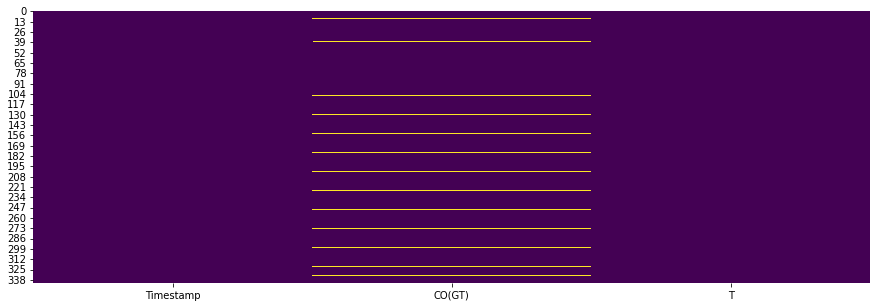

In [27]:
### cheking for the missing data
plt.figure(figsize = (15,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [28]:
df['CO(GT)'].isnull().value_counts()

False    326
True      16
Name: CO(GT), dtype: int64

So here, there are 16 missing values in our CO(GT) column and zero missing values in our Temperature (T) column

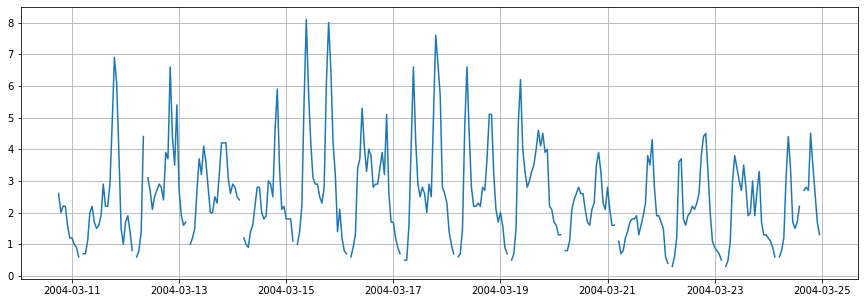

In [29]:
### plotting CO(GT) column with respect to Time
plt.figure(figsize = (15,5))
plt.plot(df['Timestamp'], df['CO(GT)'])
plt.grid(True)

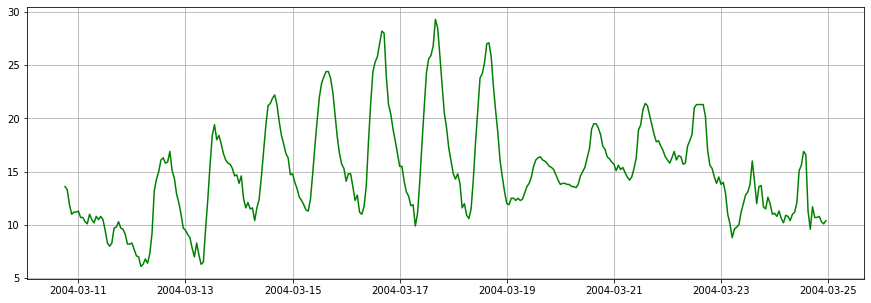

In [30]:
plt.figure(figsize = (15,5))
plt.plot(df['Timestamp'], df['T'], color='green')
plt.grid(True)

In [31]:
### using linear interpolation to remove missing values from our data
df=df.interpolate()

In [32]:
### checking the data point till which we have to train the model initially
print("The data point till which the model needs to be trained is :", df[df['Timestamp'] == '2004-03-17 23:00:00'].index[0])

The data point till which the model needs to be trained is : 173


In [33]:
train = df.loc[:173, :]
test = df.loc[174, :]

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [35]:
train.index = train.Timestamp

Seasonal decomposition of values in CO(GT) column :



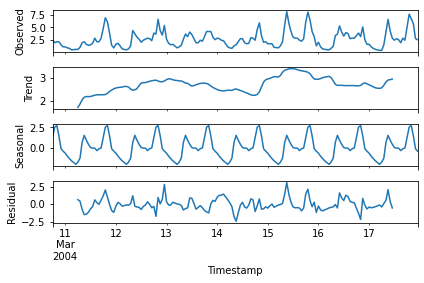

In [36]:
print("Seasonal decomposition of values in CO(GT) column :\n")
result_CO = seasonal_decompose(train['CO(GT)']).plot()

Seasonal decomposition of values in T column :



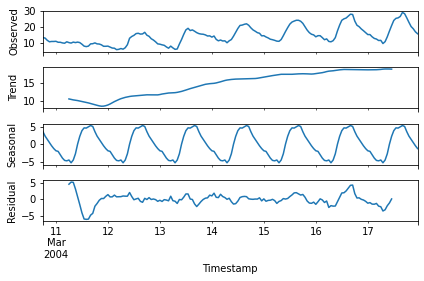

In [37]:
print("Seasonal decomposition of values in T column :\n")
result_T = seasonal_decompose(train['T']).plot()

ACF plot of CO(GT) column :



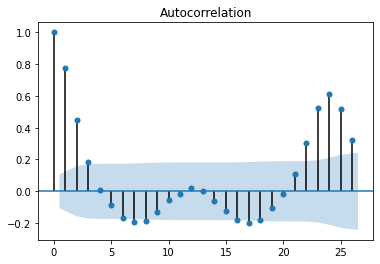

In [38]:
print("ACF plot of CO(GT) column :\n")
result_CO = plot_acf(df['CO(GT)'])

ACF plot of T column :



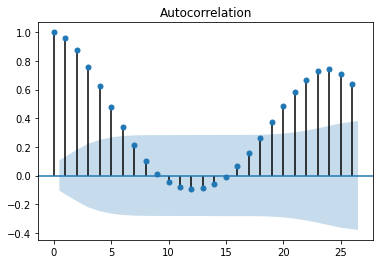

In [39]:
print("ACF plot of T column :\n")
result_T = plot_acf(df['T'])

In [40]:
### Using a function to calculate the root-mean-square value of three values
def rms(list):
  sum=0
  for i in list:
    sum = sum + i**2
  mean_of_squares = sum/len(list)
  rms=mean_of_squares ** 0.5
  return rms

In [41]:
def preprocess_data(data, column):
  df1 = data.copy()
  df1 = df1[['Timestamp', column]]
  
  ### Doing appropriate feature engineering like past 5 lags, rolling mean, rolling standard deviation
  df1['lag1'] = df1[column].shift(1)
  df1['lag2'] = df1[column].shift(2)
  df1['lag3'] = df1[column].shift(3)
  df1['lag22'] = df1[column].shift(22)
  df1['lag23'] = df1[column].shift(23) 
  df1['lag24'] = df1[column].shift(24) 
  df1['lag25'] = df1[column].shift(25)
  if column == 'T':
    df1['lag4'] = df1[column].shift(4)
    df1['lag5'] = df1[column].shift(5)


  df1['rolling_mean'] = df1[column].rolling(3).mean().shift(1)
  df1['rolling_std'] = df[column].rolling(3).std().shift(1)

  ### Dropping null values obtained by shifting rows
  df1 = df1.dropna()
  df1.reset_index(drop=True, inplace=True)

  ### Creating hour and date columns from Timestamp
  hours = []
  for i in df1['Timestamp']:
    hours.append(i.strftime("%H"))
  df1['hour'] = hours

  days = []
  for i in df1['Timestamp']:
    days.append(i.strftime("%d"))
  df1['day'] = days

  ### Creating the column "dayofweek" from the scale 0-6 denoting Monday-Sunday 
  df1['dayofweek'] = df1['Timestamp'].dt.dayofweek
  
  ### Creating a new column as root-mean-square(rms) of past 3 values
  rms_values = []  
  for i in range(len(df1)):
    lag1 = df1.iloc[i, :]['lag1']
    lag2 = df1.iloc[i, :]['lag2']
    lag3 = df1.iloc[i, :]['lag3']
    rms_values.append(rms([lag1, lag2, lag3]))
  
  df1['rms'] = rms_values
  df1.drop("Timestamp", axis=1, inplace=True)
  
  ### creating new columns as expanding_mean and expanding_std for expanding window statistics
  df1['expanding_mean'] = df[column].expanding(2).mean().shift(1)
  df1['expanding_std'] = df[column].expanding(2).std().shift(1)

  df1 = df1.dropna()
  df1.reset_index(drop=True, inplace=True)
  
  df1['hour'] = df1['hour'].astype(np.float)
  df1['day'] = df1['day'].astype(np.float)
  
  return df1

In [42]:
### defining a function to get the nth lag from the first column in data 
def past_lag(n):
  lag = train.iloc[-n, 0]
  return lag

In [43]:
train.reset_index(drop=True, inplace=True)

In [44]:
### creating a new dataframe as new_df obtained after feature engineering
new_df = preprocess_data(train, "CO(GT)")
new_df.head(3)

,CO(GT),lag1,lag2,lag3,lag22,lag23,lag24,lag25,rolling_mean,rolling_std,hour,day,dayofweek,rms,expanding_mean,expanding_std
0,3.9,6.1,6.9,4.8,1.2,1.6,2.2,2.2,5.933333,1.059874,21.0,11.0,3,5.996110,2.300000,0.424264
1,1.5,3.9,6.1,6.9,1.2,1.2,1.6,2.2,5.633333,1.553491,22.0,11.0,3,5.774369,2.266667,0.305505
2,1.0,1.5,3.9,6.1,1.0,1.2,1.2,1.6,3.833333,2.300725,23.0,11.0,3,4.268880,2.250000,0.251661


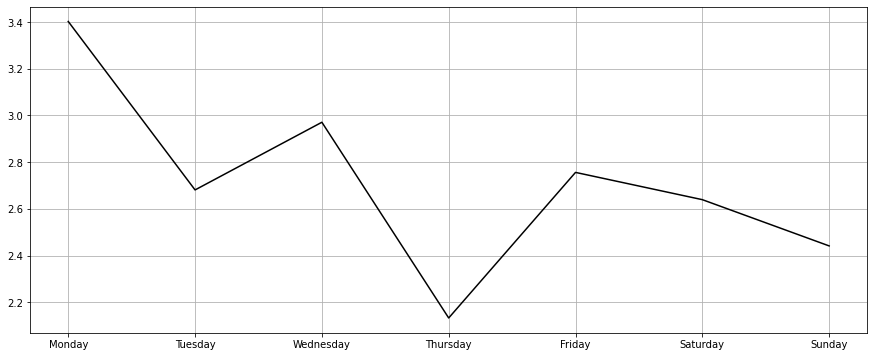

In [45]:
plt.figure(figsize=(15,6))
plt.plot([x for x in range(0,7)], new_df.groupby('dayofweek')['CO(GT)'].mean(), color='Black')
plt.xticks(ticks = [x for x in range(0,7)], labels=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.grid(True)

from the graph, we can observe that the CO concentration in the air is low on Sundays and Thursdays and tend to be high on Mondays. The reason for the CO concentration on Thursdays being low may be due to the fact that due to feature engineering some amount of data did not get used up due to the presence of NaN values

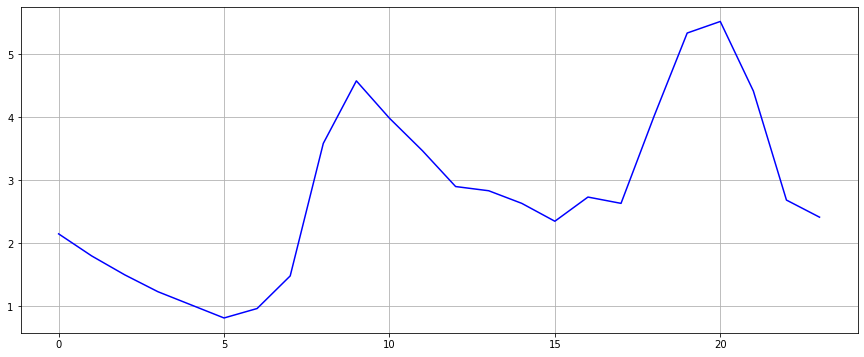

In [46]:
plt.figure(figsize=(15,6))
plt.plot([x for x in range(0,24)], new_df.groupby('hour')['CO(GT)'].mean(), color='blue')
plt.grid(True)

Also, the CO concentration of CO in the air is low at 5:00 and high at 20:00

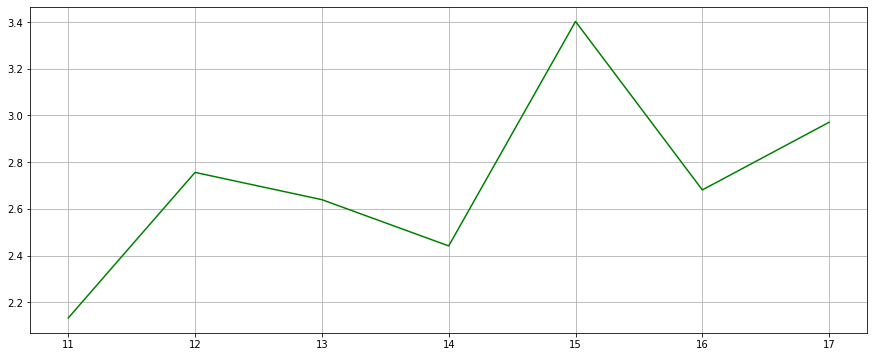

In [47]:
plt.figure(figsize=(15,6))
plt.plot(new_df.groupby('day')['CO(GT)'].mean().index, new_df.groupby('day')['CO(GT)'].mean(), color='green')
plt.grid(True)

In [48]:
### creating a new dataframe as new_df_T obtained after feature engineering
new_df_T = preprocess_data(train, "T")
new_df_T.head(3)

,T,lag1,lag2,lag3,lag22,lag23,lag24,lag25,lag4,lag5,rolling_mean,rolling_std,hour,day,dayofweek,rms,expanding_mean,expanding_std
0,9.1,9.6,9.7,10.3,11.2,11.2,11.0,11.9,9.8,9.7,9.866667,0.378594,21.0,11.0,3,9.871508,13.450000,0.212132
1,8.2,9.1,9.6,9.7,11.3,11.2,11.2,11.0,10.3,9.8,9.466667,0.321455,22.0,11.0,3,9.470304,12.933333,0.907377
2,8.2,8.2,9.1,9.6,10.7,11.3,11.2,11.2,9.7,10.3,8.966667,0.709460,23.0,11.0,3,8.985358,12.450000,1.217922


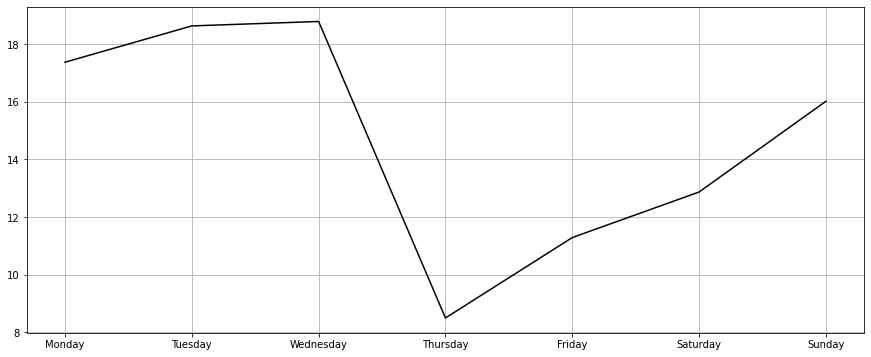

In [49]:
plt.figure(figsize=(15,6))
plt.plot([x for x in range(0,7)], new_df_T.groupby('dayofweek')['T'].mean(), color='Black')
plt.xticks(ticks = [x for x in range(0,7)], labels=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.grid(True)

Clearly, the temperature tends to be high on sundays and are a little bit lower on thursdays, this may be due to the fact that due to feature engineering some amount of data did not get used up due to the presence of NaN values

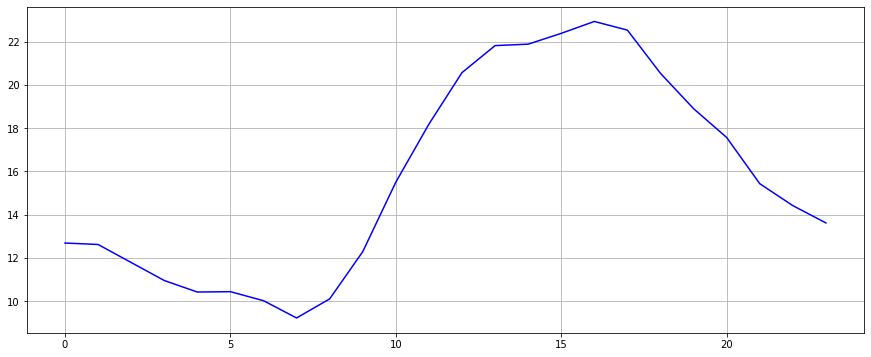

In [50]:
plt.figure(figsize=(15,6))
plt.plot([x for x in range(0,24)], new_df_T.groupby('hour')['T'].mean(), color='blue')
plt.grid(True)

From the graph above, we can observe that the Temperature is high at around 15:00 and low at around 5:00-7:00, which is obvious

In [51]:
def split(splitpoint, data):

  train = data.loc[:splitpoint, :]
  test = data.loc[splitpoint+1:, :]
  return train, test

In [52]:
!pip install catboost

In [53]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [54]:
def predict(column, model, n=24, day=0):

  x, y = split(173+24*day, df)
  x = x[['Timestamp',column]]
  y = y[['Timestamp', column]]

  for i in range(n):
    
    train = preprocess_data(x, column=column)
    
    model = model
    model.fit(np.array(train.drop([column], axis=1)), np.array(train[column]))
    
    lag1 = train[column][len(train)-1]
    lag2 = train[column][len(train)-2]
    lag3 = train[column][len(train)-3]
    lag22 = train[column][len(train)-22]
    lag23 = train[column][len(train)-23]
    lag24 = train[column][len(train)-24]
    lag25 = train[column][len(train)-25]
    lag4 = train[column][len(train)-4]
    lag5 = train[column][len(train)-5]

    rolling_mean = np.mean([lag1, lag2, lag3])
    rolling_std = np.std([lag1, lag2, lag3], ddof=1)

    if train['hour'][len(train)-1] == 23:
      hour = 00
    else:
      hour = train['hour'][len(train)-1] + 1
    day = train['day'][len(train)-1] + 1

    if train['dayofweek'][len(train)-1] == 6:
      dayofweek = 0
    else:
      dayofweek = train['dayofweek'][len(train)-1] + 1

    rms_val = rms([lag1, lag2, lag3])

    expanding_mean = train[column].mean()
    expanding_std = train[column].std()

    if column == "T":
      test_record = [lag1, lag2, lag3, lag22, lag23, lag24, lag25, lag4, lag5, rolling_mean, rolling_std,\
                    hour, day, dayofweek, rms_val, expanding_mean, expanding_std]
    elif column == "CO(GT)":
      test_record = [lag1, lag2, lag3, lag22, lag23, lag24, lag25, rolling_mean, rolling_std,\
                    hour, day, dayofweek, rms_val, expanding_mean, expanding_std]  
    prediction = model.predict(np.array(test_record).reshape(1, -1))[0]

    x.loc[len(x), :] = np.array([x['Timestamp'][len(x)-1] + datetime.timedelta(hours=1), prediction])

  return x.tail(n), y.head(n)


In [55]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
losses_T = []
y_true_T = []
y_pred_T = []
for day in range(0,7):
  predictions, true_values = predict('T', GradientBoostingRegressor(random_state=1), n=24, day=day)
  losses_T.append(mean_absolute_percentage_error(y_true = true_values['T'], y_pred = predictions['T']))
  for i in true_values['T']:
    y_true_T.append(i)
  for i in predictions['T']:
    y_pred_T.append(i)

In [57]:
print("Losses for each day :", losses_T)
print("mean of losses of all days :", np.mean(losses_T))

Losses for each day : [0.08606343479640287, 0.07391347301621502, 0.10819316444870486, 0.053084245724301225, 0.09341457055571861, 0.3495233271857107, 0.10193933476342697]
mean of losses of all days : 0.12373307864149719


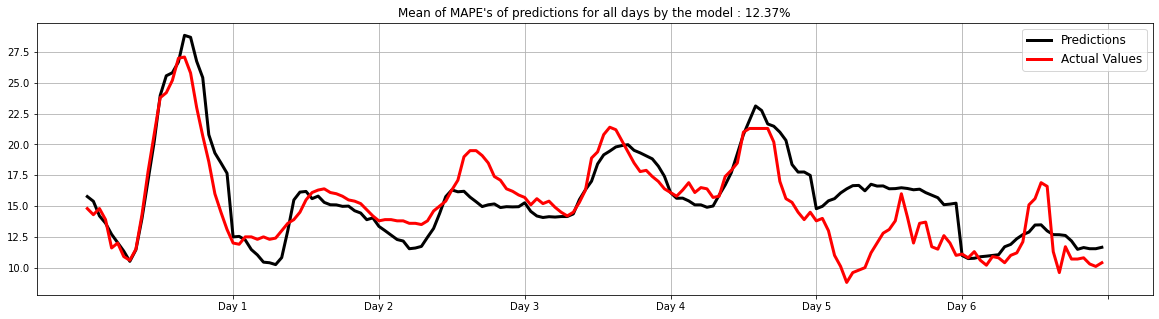

In [58]:
plt.figure(figsize = (20, 5))
plt.plot([x for x in range(len(y_pred_T))], y_pred_T, color='k', linewidth=3, label='Predictions')
plt.plot([x for x in range(len(y_true_T))], y_true_T, color='red', linewidth=3, label='Actual Values')
plt.xticks(ticks=[24,48,72,96,120,144,168], labels=['Day '+str(x) for x in range(1,7)])
plt.title("Mean of MAPE's of predictions for all days by the model : {0:.2f}%".format(np.mean(losses_T)*100))
plt.legend(fontsize='large')
plt.grid(True)

In [59]:
losses_CO = []
y_true_CO = []
y_pred_CO = []
for day in range(0,7):
  predictions, true_values = predict('CO(GT)', XGBRegressor(objective='reg:squarederror'), n=24, day=day)
  losses_CO.append(mean_absolute_percentage_error(y_true = true_values['CO(GT)'], y_pred = predictions['CO(GT)']))
  for i in true_values['CO(GT)']:
    y_true_CO.append(i)
  for i in predictions['CO(GT)']:
    y_pred_CO.append(i)

In [60]:
print("Losses for each day :", losses_CO)
print("mean of losses of all days :", np.mean(losses_CO))

Losses for each day : [0.16952463731473533, 0.1614383577512539, 0.4688354707909475, 0.4919035260326889, 0.5780410388605102, 0.3897333583699474, 0.2852224939780146]
mean of losses of all days : 0.3635284118711568


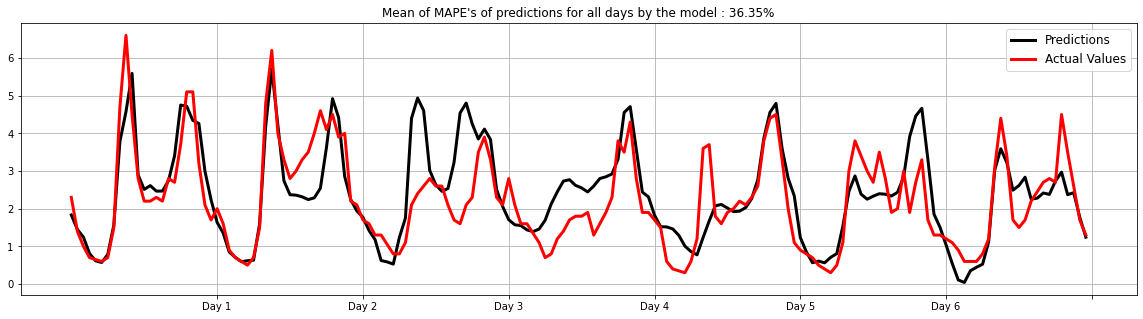

In [61]:
plt.figure(figsize = (20, 5))
plt.plot([x for x in range(len(y_pred_CO))], y_pred_CO, color='k', linewidth=3, label='Predictions')
plt.plot([x for x in range(len(y_true_CO))], y_true_CO, color='red', linewidth=3, label='Actual Values')
plt.xticks(ticks=[24,48,72,96,120,144,168], labels=['Day '+str(x) for x in range(1,7)])
plt.title("Mean of MAPE's of predictions for all days by the model : {0:.2f}%".format(np.mean(losses_CO)*100))
plt.legend(fontsize='large')
plt.grid(True)